In [28]:
!pip install pandas-profiling

In [30]:
from pandas import Series
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, f1_score, log_loss, average_precision_score
from sklearn.metrics import precision_score, accuracy_score, brier_score_loss, confusion_matrix

from ydata_profiling import ProfileReport


In [15]:
data = pd.read_csv('train.csv')
data.head()

client_id   app_date education sex  age car car_type  decline_app_cnt  \
0      25905  01FEB2014       SCH   M   62   Y        Y                0   
1      63161  12MAR2014       SCH   F   59   N        N                0   
2      25887  01FEB2014       SCH   M   25   Y        N                2   
3      16222  23JAN2014       SCH   F   53   N        N                0   
4     101655  18APR2014       GRD   M   48   N        N                0   

   good_work  score_bki  bki_request_cnt  region_rating  home_address  \
0          0  -2.008753                1             50             1   
1          0  -1.532276                3             50             2   
2          0  -1.408142                1             80             1   
3          0  -2.057471                2             50             2   
4          1  -1.244723                1             60             2   

   work_address  income  sna  first_time foreign_passport  default  
0             2   18000    4           1                N        0  
1             3   19000    4           1                N        0  
2             2   30000    1           4                Y        0  
3             3   10000    1           3                N        0  
4             3   30000    1           4                Y        0

In [16]:
def scores(y_test, y_pred, prob):
    fpr, tpr, threshold = roc_curve(y_test, prob)
    roc_auc = roc_auc_score(y_test, prob)

    plt.figure()
    plt.plot([0, 1], label='Baseline', linestyle='--')
    plt.plot(fpr, tpr, label = 'Regression')
    plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()
    print ("f1_score:",round(f1_score(y_test,y_pred), 3))
    print ("accuracy_score:",round(accuracy_score(y_test,y_pred), 3))
    print ("precision_score:",round(precision_score(y_test,y_pred), 3))
    print ("recall_score:",round(recall_score(y_test,y_pred), 3))
    print ("log_loss:",round(log_loss(y_test,y_pred), 3))
    print ("roc_auc_score:",round(roc_auc, 3))
    print("average_precision_score:", round(average_precision_score(y_test,y_pred), 3))
    print("brier_score_loss:", round(brier_score_loss(y_test,y_pred), 3))
    print('Confusion matrix:\n{}' .format(confusion_matrix(y_test,y_pred)))

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [18]:
data_naive = data.copy()
data_naive.dropna(inplace = True)
ord_enc = OrdinalEncoder()
data_naive.drop(['client_id','app_date'],axis=1,inplace=True)
obj_columns = data_naive.select_dtypes(include=['object']).columns
data_naive[obj_columns] = ord_enc.fit_transform(data_naive[obj_columns]).astype(int)
data_naive.head(5)

education  sex  age  car  car_type  decline_app_cnt  good_work  score_bki  \
0          3    1   62    1         1                0          0  -2.008753   
1          3    0   59    0         0                0          0  -1.532276   
2          3    1   25    1         0                2          0  -1.408142   
3          3    0   53    0         0                0          0  -2.057471   
4          1    1   48    0         0                0          1  -1.244723   

   bki_request_cnt  region_rating  home_address  work_address  income  sna  \
0                1             50             1             2   18000    4   
1                3             50             2             3   19000    4   
2                1             80             1             2   30000    1   
3                2             50             2             3   10000    1   
4                1             60             2             3   30000    1   

   first_time  foreign_passport  default  
0           1                 0        0  
1           1                 0        0  
2           4                 1        0  
3           3                 0        0  
4           4                 1        0

In [19]:
model = LogisticRegression()
X = data_naive.drop(['default'], axis = 1).values
y = data_naive['default'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:, 1]

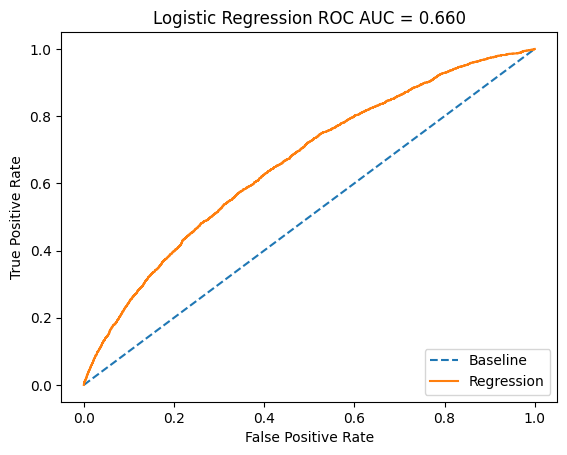

f1_score: 0.023
accuracy_score: 0.872
precision_score: 0.42
recall_score: 0.012
log_loss: 4.63
roc_auc_score: 0.66
average_precision_score: 0.131
brier_score_loss: 0.128
Confusion matrix:
[[19182    47]
 [ 2785    34]]


In [20]:
scores(y_test, y_pred, proba)

In [31]:
profile = ProfileReport(data, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='count', ylabel='education'>

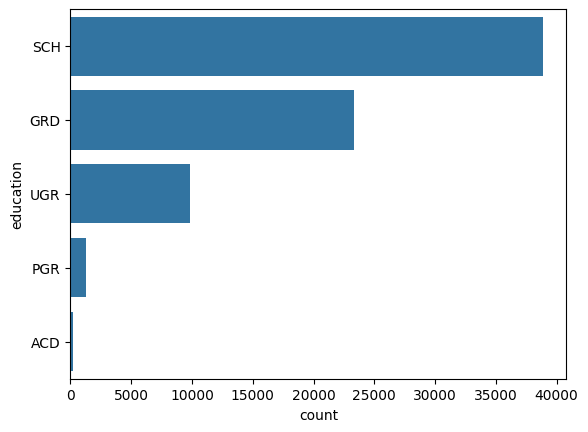

In [32]:
sns.countplot(data['education'])

In [33]:
data[data['education'].isnull()] = data[data['education'].isnull()].fillna('SCH')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73799 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [34]:
data['app_date'] = data['app_date'].apply(lambda x: datetime.datetime.strptime(x,'%d%b%Y'))
data['app_date'] = data['app_date'].apply(lambda x: (data['app_date'].max() - x).days)
data.head(5)

client_id  app_date education sex  age car car_type  decline_app_cnt  \
0      25905        88       SCH   M   62   Y        Y                0   
1      63161        49       SCH   F   59   N        N                0   
2      25887        88       SCH   M   25   Y        N                2   
3      16222        97       SCH   F   53   N        N                0   
4     101655        12       GRD   M   48   N        N                0   

   good_work  score_bki  bki_request_cnt  region_rating  home_address  \
0          0  -2.008753                1             50             1   
1          0  -1.532276                3             50             2   
2          0  -1.408142                1             80             1   
3          0  -2.057471                2             50             2   
4          1  -1.244723                1             60             2   

   work_address  income  sna  first_time foreign_passport  default  
0             2   18000    4           1                N        0  
1             3   19000    4           1                N        0  
2             2   30000    1           4                Y        0  
3             3   10000    1           3                N        0  
4             3   30000    1           4                Y        0

In [35]:
ord_enc = OrdinalEncoder()
obj_columns = data.select_dtypes(include=['object']).columns
data[obj_columns] = ord_enc.fit_transform(data[obj_columns]).astype(int)
data.head(5)

client_id  app_date  education  sex  age  car  car_type  decline_app_cnt  \
0      25905        88          3    1   62    1         1                0   
1      63161        49          3    0   59    0         0                0   
2      25887        88          3    1   25    1         0                2   
3      16222        97          3    0   53    0         0                0   
4     101655        12          1    1   48    0         0                0   

   good_work  score_bki  bki_request_cnt  region_rating  home_address  \
0          0  -2.008753                1             50             1   
1          0  -1.532276                3             50             2   
2          0  -1.408142                1             80             1   
3          0  -2.057471                2             50             2   
4          1  -1.244723                1             60             2   

   work_address  income  sna  first_time  foreign_passport  default  
0             2   18000    4           1                 0        0  
1             3   19000    4           1                 0        0  
2             2   30000    1           4                 1        0  
3             3   10000    1           3                 0        0  
4             3   30000    1           4                 1        0

<Axes: xlabel='age', ylabel='Density'>

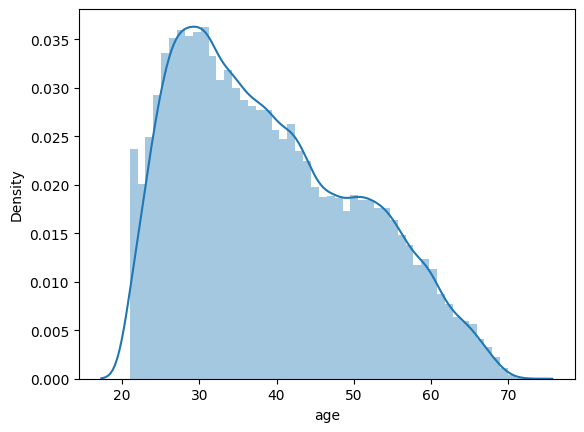

In [36]:
plt.figure()
sns.distplot(data['age'])

<Axes: xlabel='age', ylabel='Density'>

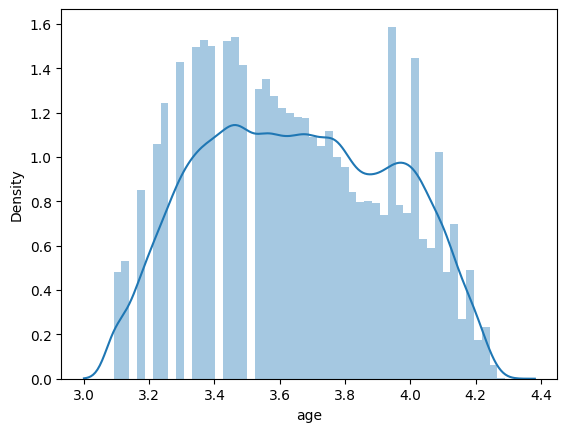

In [37]:
plt.figure()
sns.distplot(data['age'].apply(lambda x: np.log(x+1)))

In [38]:
data['age'] = data['age'].apply(lambda x: np.log(x+1))

<Axes: xlabel='score_bki', ylabel='Density'>

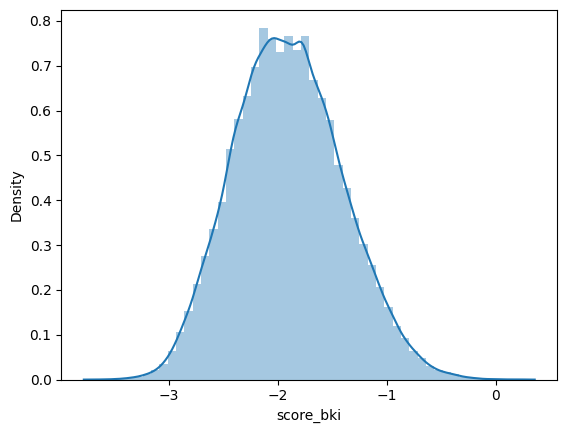

In [39]:
plt.figure()
sns.distplot(data['score_bki'])

<Axes: xlabel='income', ylabel='Density'>

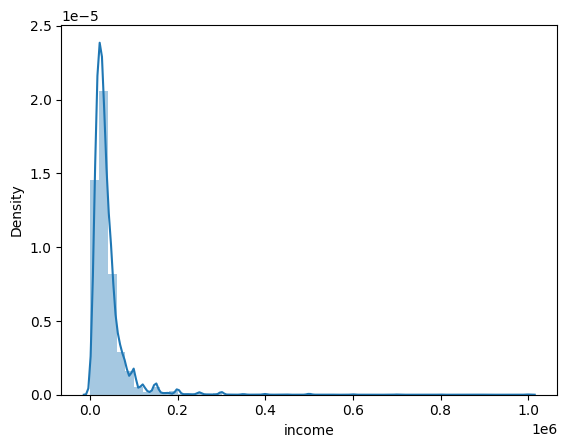

In [40]:
plt.figure()
sns.distplot(data['income'])

<Axes: xlabel='income', ylabel='Density'>

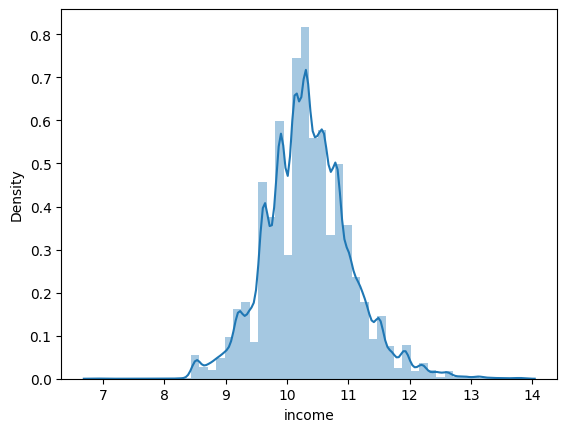

In [41]:
plt.figure()
sns.distplot(data['income'].apply(lambda x: np.log(x+1)))

In [42]:
data['income'] = data['income'].apply(lambda x: np.log(x+1))

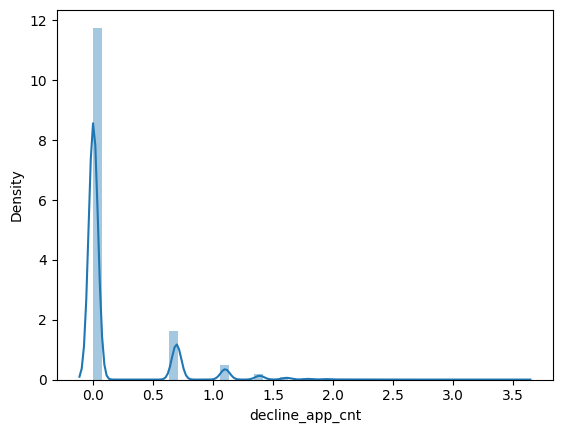

In [43]:
plt.figure()
sns.distplot(data['decline_app_cnt'].apply(lambda x: np.log(x+1)))
data['decline_app_cnt'] = data['decline_app_cnt'].apply(lambda x: np.log(x+1))

<Axes: xlabel='bki_request_cnt', ylabel='Density'>

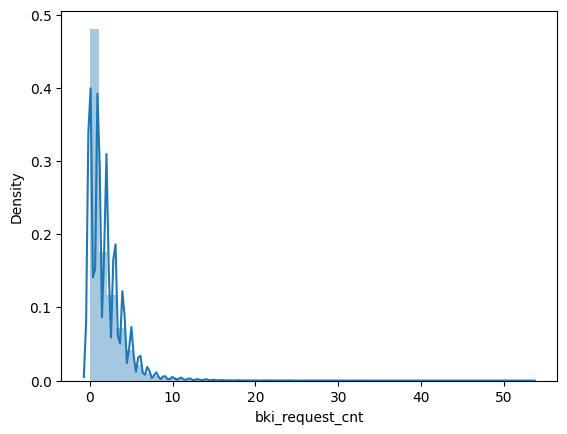

In [44]:
plt.figure()
sns.distplot(data['bki_request_cnt'])

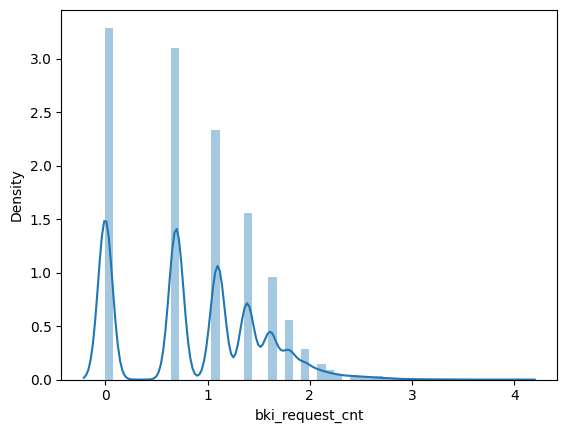

In [45]:
plt.figure()
sns.distplot(data['bki_request_cnt'].apply(lambda x: np.log(x+1)))
data['bki_request_cnt'] = data['bki_request_cnt'].apply(lambda x: np.log(x+1))


<Axes: xlabel='app_date', ylabel='Density'>

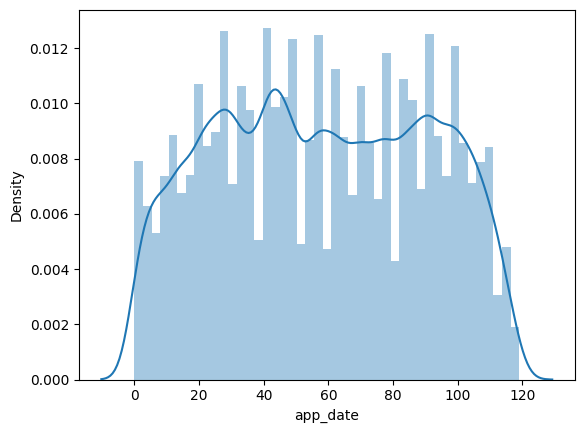

In [46]:
plt.figure()
sns.distplot(data['app_date'])

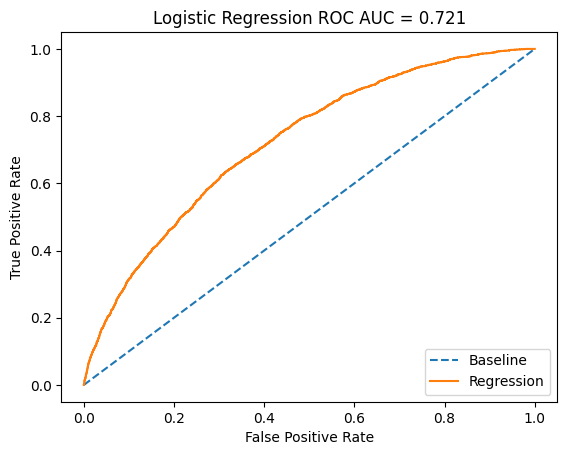

f1_score: 0.334
accuracy_score: 0.674
precision_score: 0.226
recall_score: 0.64
log_loss: 11.767
roc_auc_score: 0.721
average_precision_score: 0.19
brier_score_loss: 0.326
Confusion matrix:
[[13047  6182]
 [ 1016  1803]]


In [49]:
model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:, 1]
scores(y_test, y_pred, proba)

In [50]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 2.7825594022071245


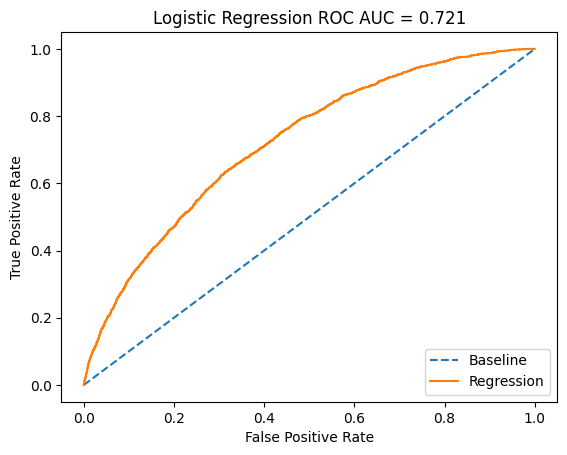

f1_score: 0.334
accuracy_score: 0.673
precision_score: 0.226
recall_score: 0.64
log_loss: 11.772
roc_auc_score: 0.721
average_precision_score: 0.19
brier_score_loss: 0.327
Confusion matrix:
[[13044  6185]
 [ 1016  1803]]


In [51]:
scores(y_test, best_model.predict(X_test) , best_model.predict_proba(X_test)[:, 1])